<a href="https://colab.research.google.com/github/prestyprajna/Credit_Card_Fraud_Detection/blob/master/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt   
%matplotlib inline

#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
df2['Country'] = le.fit_transform(df2['Country'])
df2['Transaction_Amount'] = le.fit_transform(df2['Transaction_Amount'])
df2['Transaction_Time'] = le.fit_transform(df2['Transaction_Time'])
df2['Transaction_Date_And_Time'] = le.fit_transform(df2['Transaction_Date_And_Time'])
df2['Target'] = le.fit_transform(df2['Target'])

#display the initial records
#df2.head(n=15)

In [0]:
first  = df2.loc[df2['Target'] == 0]  #used to select rows whose Target value is 0
second = df2.loc[df2['Target'] == 1]  #used to select rows whose Target value is 1


# select needed columns 
cols = [col for col in df2.columns if col not in ['Target','Transaction_Date']]

# dropping the 'Target' column
data = df2[cols]

#assigning the Target column as target
target = df2['Target']
#data.head(n=2)

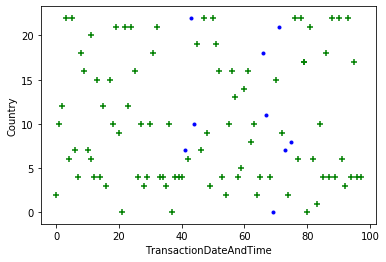

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('TransactionDateAndTime')
plt.ylabel('Country')
plt.scatter(first['Transaction_Date_And_Time'], first['Country'],color="green",marker='+')
plt.scatter(second['Transaction_Date_And_Time'], second['Country'],color="blue",marker='.')

In [48]:
#NON LINEAR SVC


from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
# Attributes that will be used by the gridsearchCV algorithm 
attr={'C': [0.1, 1, 2, 5, 10, 25, 50, 100],
      'gamma': [1e-1, 1e-2, 1e-3]
     }

X_train, X_test, y_train, y_test = train_test_split(data, target.ravel(), test_size=0.4,random_state=10)
#X_train, X_test, y_train, y_test = train_test_split(data, target.ravel(), test_size=0.4)
model = SVC()
classif = GridSearchCV(model, attr, cv=5)
classif.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 2, 5, 10, 25, 50, 100],
                         'gamma': [0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [49]:
y_pred = classif.predict(X_test)

print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('Precision:', precision_score(y_test, y_pred,average='weighted'))                                   
print ('Recall:', recall_score(y_test, y_pred,average='weighted'))
print ('F1 score:', f1_score(y_test, y_pred,average='weighted'))

Accuracy: 0.875
Precision: 0.9642857142857142
Recall: 0.875
F1 score: 0.905320813771518


In [50]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

#Make an instance of the Model
logisticRegr = LogisticRegression()

#Training the model on the data, storing the information learned from the data
#Model is learning the relationship
logisticRegr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
y_pred = logisticRegr.predict(X_test)

print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('Precision:', precision_score(y_test, y_pred,average='weighted'))                                   
print ('Recall:', recall_score(y_test, y_pred,average='weighted'))
print ('F1 score:', f1_score(y_test, y_pred,average='weighted'))

Accuracy: 0.95
Precision: 0.9025000000000001
Recall: 0.95
F1 score: 0.9256410256410256


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [54]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
#model.score(X_test, y_test)
y_pred = model.predict(X_test)

print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('Precision:', precision_score(y_test, y_pred,average='weighted'))                                   
print ('Recall:', recall_score(y_test, y_pred,average='weighted'))
print ('F1 score:', f1_score(y_test, y_pred,average='weighted'))

Accuracy: 0.975
Precision: 0.9833333333333334
Recall: 0.975
F1 score: 0.9773333333333334
